In [3]:
!pip install -q opencv-python matplotlib


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


/var/folders/96/_p6376jd0_scrpsdsmh4v5dr0000gn/T/ipykernel_19121/3446479878.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


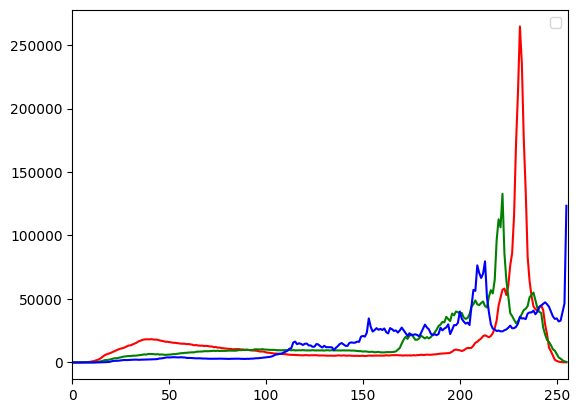

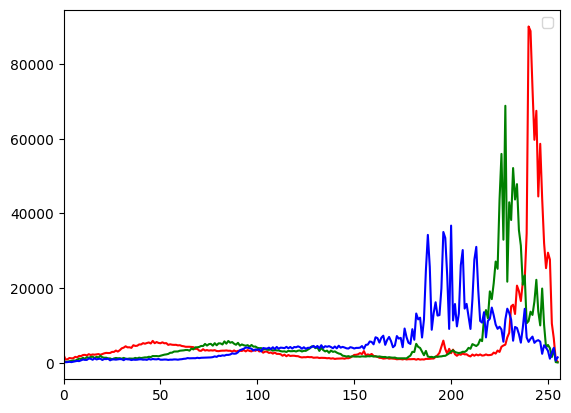

Distanza totale tra AdobeStock_41960375-scaled.jpeg e cani-freddo-4.webp: -0.30111129150000604


In [ ]:
from cv2 import GaussianBlur

def plot_rgb_histogram(image_path):
    """Genera un istogramma RGB per una singola immagine."""
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    #image = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hist_gray = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Separare i canali RGB
    r, g, b = cv2.split(image)
  
    # Calcolare gli istogrammi per ogni canale
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    plt.plot(hist_r, color='r')
    plt.plot(hist_g, color='g')
    plt.plot(hist_b, color='b')
    
    plt.xlim([0, 256])
    plt.legend()
    plt.show()

    return hist_r, hist_g, hist_b 
    #return hist_gray

def calculate_histogram_distance(hist1, hist2, method=cv2.HISTCMP_CORREL):
    """Calcola la distanza tra due istogrammi usando il metodo specificato."""
    return cv2.compareHist(hist1, hist2, method)

def process_images_from_folder(folder_path):
    """Processa tutte le immagini in una cartella e calcola la distanza tra gli istogrammi RGB."""
    if not os.path.exists(folder_path):
        print("Errore: La cartella specificata non esiste.")
        return
    
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'webp'))]
    if not image_files:
        print("Nessuna immagine trovata nella cartella.")
        return
    
    histograms_list = []
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        hist_r, hist_g, hist_b = plot_rgb_histogram(image_path)
        histograms_list.append((image_file, hist_r, hist_g, hist_b))
        #hist = plot_rgb_histogram(image_path)  
        #histograms_list.append((image_file, hist))
    
    # Calcolare la distanza tra gli istogrammi delle immagini
    for i in range(len(histograms_list)):
        for j in range(i + 1, len(histograms_list)):  
            
            image1, hist_r1, hist_g1, hist_b1 = histograms_list[i]
            image2, hist_r2, hist_g2, hist_b2 = histograms_list[j]         
            #image1, hist1 = histograms_list[i]
            #image2, hist2 = histograms_list[j]
            
            # Calcoliamo la distanza tra ogni canale (r, g, b)
            total_distance = 0
            
            total_distance += calculate_histogram_distance(hist_r1, hist_r2)
            total_distance += calculate_histogram_distance(hist_g1, hist_g2)
            total_distance += calculate_histogram_distance(hist_b1, hist_b2)
            
            #total_distance += calculate_histogram_distance(hist1, hist2)
            total_distance = 1-total_distance
        
            print(f"Distanza totale tra {image1} e {image2}: {total_distance}")

folder_path = "/Users/filipporeucci/Desktop/cani"
process_images_from_folder(folder_path)
